#  **Predicting Student Dropout Likelihood in Personalized Learning Environments**

## **Overview of Problem Statement:**
Student dropout remains a significant concern in personalized learning environments, despite their potential to cater to individual student needs and preferences. This poses a challenge for both educational institutions and individual learners, leading to wasted resources, decreased student success rates, and potential discouragement for students.

There is a critical need for effective methods to identify students at risk of dropping out in personalized learning environments. Predictive models can leverage student data to provide early warnings and enable educators to intervene before students disengage completely.


## **Objective:**

This project aims to:

1) Identify factors influencing student dropout in personalized learning.

2) Develop a predictive model for early identification of at-risk students.

3) Provide actionable insights to improve student retention and success.

## **Data Description:**

**Source:**

**Dataset link:**https://www.kaggle.com/datasets/adilshamim8/personalized-learning-and-adaptive-education-dataset

**Description**

This dataset is designed to support research on adaptive learning systems, personalized education, and predictive student success modeling. It captures rich interaction logs from online education platforms, including student engagement, quiz performance, learning preferences, and dropout likelihood.

**Dataset Features**


1) Age – Student's age (15-50 years)

2) Gender – Male, Female, Other

3)Education_Level – High School, Undergraduate, Postgraduate

4)Course_Name – Online course enrolled (e.g., Machine Learning, Python Basics, Data Science)

5)Time_Spent_on_Videos (mins) – Total minutes spent watching videos

6)Quiz_Attempts – Number of attempts per quiz

7)Quiz_Scores (%) – Percentage score in quizzes

8)Forum_Participation (posts) – Number of forum discussions participated in

9) Assignment_Completion_Rate (%) – Percentage of completed assignments

10) Engagement_Level – Low, Medium, High (Based on activity metrics)

11)Final_Exam_Score (%) – Percentage score in the final exam

12)Learning_Style – Visual, Auditory, Reading/Writing, Kinesthetic

13)Feedback_Score (1-5) – Student rating of the course

**Target Variable:**

Dropout_Likelihood (Yes/No) – Whether the student is likely to drop out

# **Importing libraries**

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


In [5]:

#load the dataset
df=pd.read_csv('/content/personalized_learning_dataset.csv')
df.head(5)

,Student_ID,Age,Gender,Education_Level,Course_Name,Time_Spent_on_Videos,Quiz_Attempts,Quiz_Scores,Forum_Participation,Assignment_Completion_Rate,Engagement_Level,Final_Exam_Score,Learning_Style,Feedback_Score,Dropout_Likelihood
0,S00001,15,Female,High School,Machine Learning,171,4,67,2,89,Medium,51,Visual,1,No
1,S00002,49,Male,Undergraduate,Python Basics,156,4,64,0,94,Medium,92,Reading/Writing,5,No
2,S00003,20,Female,Undergraduate,Python Basics,217,2,55,2,67,Medium,45,Reading/Writing,1,No
3,S00004,37,Female,Undergraduate,Data Science,489,1,65,43,60,High,59,Visual,4,No
4,S00005,34,Female,Postgraduate,Python Basics,496,3,59,34,88,Medium,93,Visual,3,No


In [6]:
df.shape

(10000, 15)

# **Note:**
     



*   shape of dataframe is (10000*14)
*   Rows=10000



*   Columns=14



In [7]:
#information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Student_ID                  10000 non-null  object
 1   Age                         10000 non-null  int64 
 2   Gender                      10000 non-null  object
 3   Education_Level             10000 non-null  object
 4   Course_Name                 10000 non-null  object
 5   Time_Spent_on_Videos        10000 non-null  int64 
 6   Quiz_Attempts               10000 non-null  int64 
 7   Quiz_Scores                 10000 non-null  int64 
 8   Forum_Participation         10000 non-null  int64 
 9   Assignment_Completion_Rate  10000 non-null  int64 
 10  Engagement_Level            10000 non-null  object
 11  Final_Exam_Score            10000 non-null  int64 
 12  Learning_Style              10000 non-null  object
 13  Feedback_Score              10000 non-null  int

In [8]:
#statistical analysis
df.describe()

,Age,Time_Spent_on_Videos,Quiz_Attempts,Quiz_Scores,Forum_Participation,Assignment_Completion_Rate,Final_Exam_Score,Feedback_Score
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,32.137700,255.375400,2.500500,64.578600,24.616200,69.546800,64.697000,3.012600
std,10.062647,141.656392,1.122642,20.289125,14.330305,17.360782,20.096417,1.421423
min,15.000000,10.000000,1.000000,30.000000,0.000000,40.000000,30.000000,1.000000
25%,24.000000,131.000000,1.000000,47.000000,12.000000,54.000000,47.000000,2.000000
50%,32.000000,257.000000,3.000000,65.000000,25.000000,69.000000,65.000000,3.000000
75%,41.000000,378.000000,4.000000,82.000000,37.000000,85.000000,82.000000,4.000000
max,49.000000,499.000000,4.000000,99.000000,49.000000,99.000000,99.000000,5.000000


**Insights:**
Here's what we can infer about student performance based on these statistics:

1)Age: The average student age is 32.14, with a range from 15 to 49. The distribution seems relatively symmetrical, as the mean and median are close.

2)Time_Spent_on_Videos: Students spend an average of 255.38 minutes on videos. There's a wide range in video consumption (10 to 499 minutes).

3)Quiz_Attempts: Students attempt quizzes an average of 2.5 times. Most students attempt quizzes between 1 and 4 times.


4)Quiz_Scores: The average quiz score is 64.58, with scores ranging from 30 to 99.


5)Forum_Participation: Average forum participation is 24.62 (the unit is not specified, but it could be posts, comments, or a participation score). Some students do not participate in the forums (minimum value is 0).


6)Assignment_Completion_Rate: The average assignment completion rate is 69.55 (likely a percentage). Completion rates vary from 40% to 99%.


7)Final_Exam_Score: The average final exam score is 64.70, with scores ranging from 30 to 99.


8)Feedback_Score: The average feedback score is 3.01, likely on a scale of 1 to 5.


# **DATA PREPROCESSING**

## **Step 1: Handling Missing Values**

In [9]:
#missing values
df.isnull().sum()

,0
Student_ID,0
Age,0
Gender,0
Education_Level,0
Course_Name,0
Time_Spent_on_Videos,0
Quiz_Attempts,0
Quiz_Scores,0
Forum_Participation,0
Assignment_Completion_Rate,0


In [10]:
#percentage of missing values
df.isnull().mean()*100

,0
Student_ID,0.0
Age,0.0
Gender,0.0
Education_Level,0.0
Course_Name,0.0
Time_Spent_on_Videos,0.0
Quiz_Attempts,0.0
Quiz_Scores,0.0
Forum_Participation,0.0
Assignment_Completion_Rate,0.0


**There is no missing values.**

## **Step 2: Handling Duplicates**

In [11]:
#presence of duplicates
df.duplicated().sum()

np.int64(0)

**There is no duplicates**

## **Step 3: Handling Skewness**

In [12]:
#To check skewness
skewness=df.select_dtypes('number').skew()
skewness

,0
Age,-0.023052
Time_Spent_on_Videos,-0.018043
Quiz_Attempts,-0.007399
Quiz_Scores,-0.009049
Forum_Participation,-0.014128
Assignment_Completion_Rate,0.013916
Final_Exam_Score,-0.003571
Feedback_Score,-0.009044


Skewness of all numeric columns are in between -0.5 to 0.5. So, they are normally distributed.No need to make any transformations


In [13]:
#  removing Student_ID column
df=df.drop('Student_ID',axis=1)
df.head(5)

,Age,Gender,Education_Level,Course_Name,Time_Spent_on_Videos,Quiz_Attempts,Quiz_Scores,Forum_Participation,Assignment_Completion_Rate,Engagement_Level,Final_Exam_Score,Learning_Style,Feedback_Score,Dropout_Likelihood
0,15,Female,High School,Machine Learning,171,4,67,2,89,Medium,51,Visual,1,No
1,49,Male,Undergraduate,Python Basics,156,4,64,0,94,Medium,92,Reading/Writing,5,No
2,20,Female,Undergraduate,Python Basics,217,2,55,2,67,Medium,45,Reading/Writing,1,No
3,37,Female,Undergraduate,Data Science,489,1,65,43,60,High,59,Visual,4,No
4,34,Female,Postgraduate,Python Basics,496,3,59,34,88,Medium,93,Visual,3,No


# **Step 4: Handling Outliers :**

In [14]:
#creating function to detect outlier
def detect_outliers(df,columns) :
  for column in columns :
    if df[column].dtype in ['int64','float64']:
      Q1= df[column].quantile(0.25)
      Q3=df[column].quantile(0.75)
      IQR=Q3-Q1
      lower_bound=Q1-1.5*IQR
      upper_bound=Q3-1.5*IQR
      outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
  return outliers
  #calling function
  outliers=detect_outliers(df,df.columns)
  print("Outliers in the dataset :",outliers)


**There is no Outliers and the dataset is clean**

# **DATA ANALYSIS**


## **Exploratory Data Analysis**

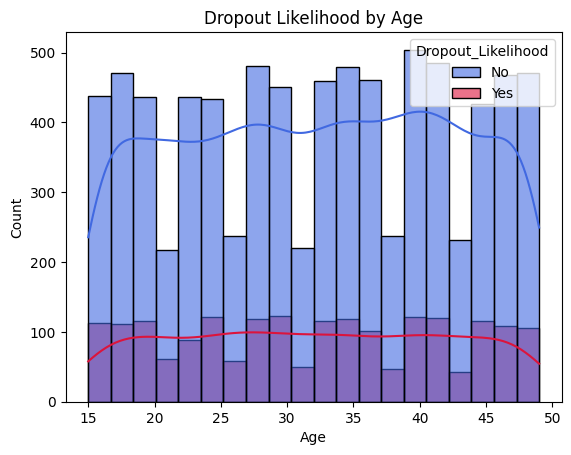

In [15]:
#Histogram to show dropout likelihood by age

sns.histplot(df, x="Age", hue="Dropout_Likelihood", bins=20, kde=True,alpha=0.6,
             palette={"No": "royalblue", "Yes": "crimson"})
plt.title("Dropout Likelihood by Age")
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

**Dropout Students Are Fewer in Every Age Group**

This suggests that the majority of students in my dataset are not at risk of dropping out.

**Dropout Rates Seem Fairly Even Across Ages**


*   There is no clear spike in dropout likelihood at any specific age range.

*   The dropout trend appears relatively stable across different ages.

**Higher Student Counts in Certain Age Groups**

*   Some age groups (e.g., around 18-22, 30-35, and 40-45) have slightly higher student counts.
*   This could be due to the inclusion of different education levels in the dataset (e.g., high school, undergrad, postgrad).


*   Ages 18-22: Higher Count Due to Undergraduate Students

*   Ages 30-35: Likely Includes Postgraduate or Working Professionals  taking part-time or online courses.

*   Ages 40-45: Adult Learners & Career Shifts














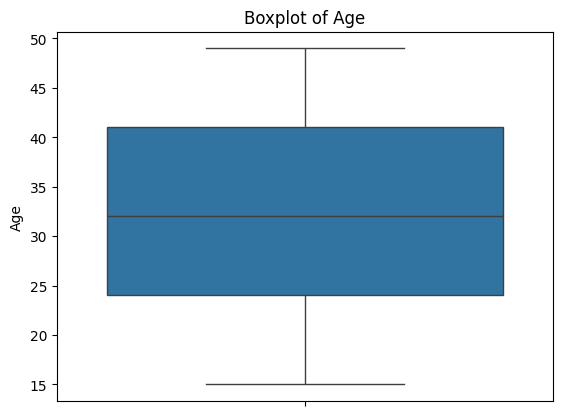

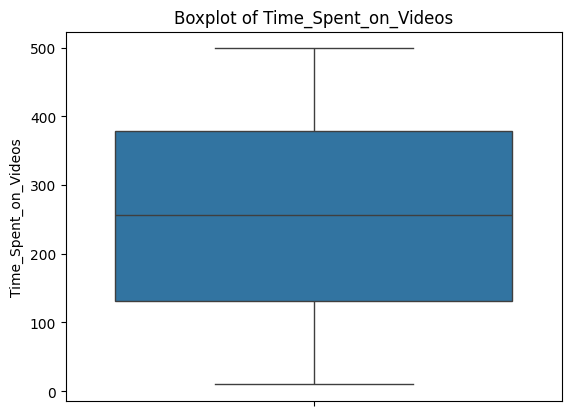

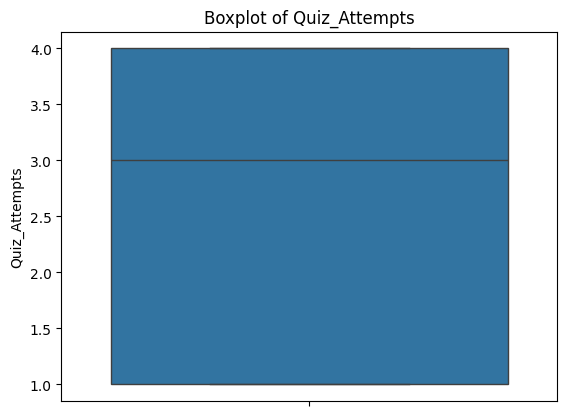

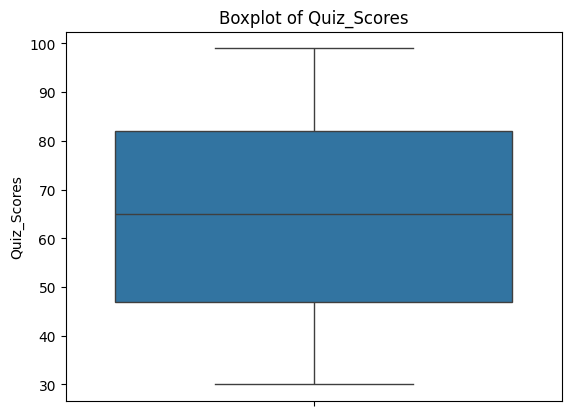

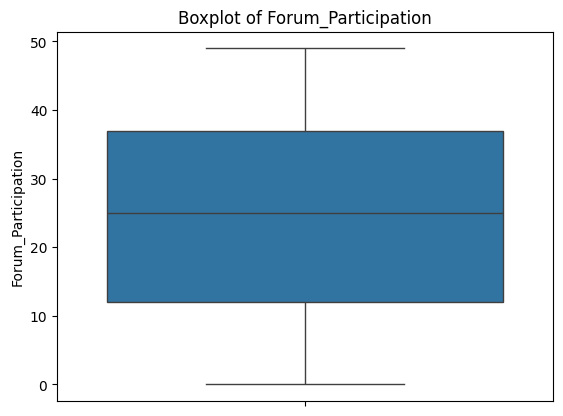

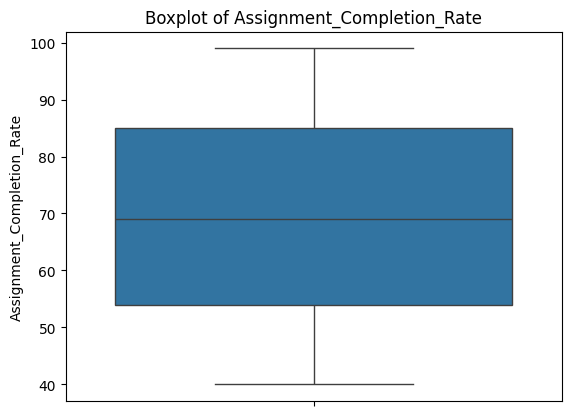

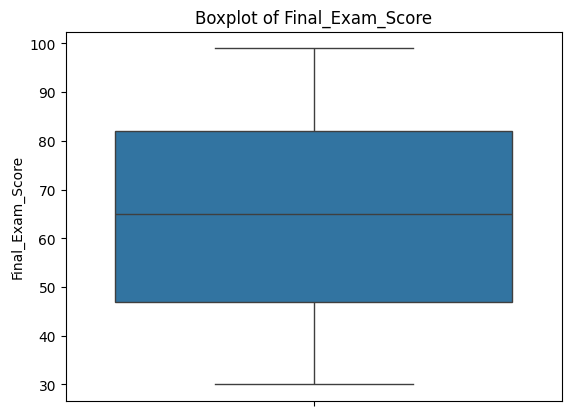

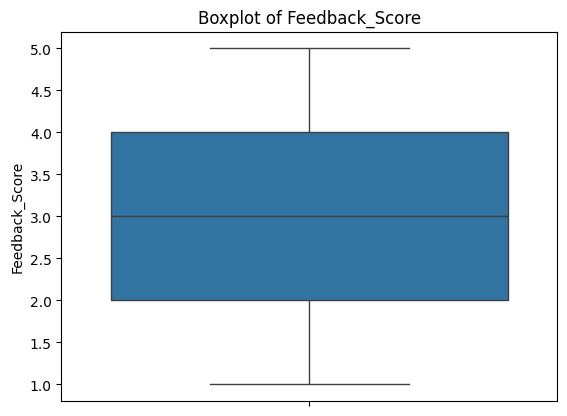

In [16]:
#Boxplot to identify outlie
for column in df.select_dtypes('number'):
  sns.boxplot(df[column])
  plt.title(f"Boxplot of {column}")
  plt.show()

**There is no Outliers**

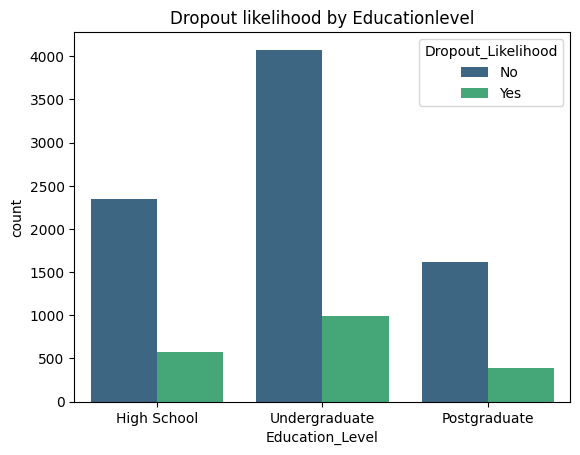

In [17]:
#countplot to show dropout of different educational levels
sns.countplot(x="Education_Level", hue="Dropout_Likelihood", data=df, palette="viridis")
plt.title("Dropout likelihood by Educationlevel")
plt.show()





**1) Undergraduate Students Have the Highest
     Dropout Rate**

*  Possible reasons: academic pressure, financial struggles, lack of motivation, or job opportunities.

**2) High School Students Also Face Dropout Issues**


*   This could be due to poor academic performance, family issues, or early job market entry.

**3) Postgraduate Students Have the Lowest Dropout Rate**

*  Postgraduates are the least likely to drop out, as seen by the small green bar.

*   Possible reasons: more career commitment, fewer financial constraints, or selective enrollment.























In [18]:
#correlation to check dependencies
correlation_matrix=df.select_dtypes("number").corr()
correlation_matrix

,Age,Time_Spent_on_Videos,Quiz_Attempts,Quiz_Scores,Forum_Participation,Assignment_Completion_Rate,Final_Exam_Score,Feedback_Score
Age,1.000000,-0.012768,0.006550,-0.026188,0.011031,-0.012556,-0.005315,-0.007484
Time_Spent_on_Videos,-0.012768,1.000000,0.003676,0.008773,0.001473,0.015924,-0.009718,0.012250
Quiz_Attempts,0.006550,0.003676,1.000000,-0.006037,-0.013633,-0.002292,-0.018079,0.001124
Quiz_Scores,-0.026188,0.008773,-0.006037,1.000000,-0.008869,0.011785,0.004705,-0.006006
Forum_Participation,0.011031,0.001473,-0.013633,-0.008869,1.000000,0.008360,-0.006267,0.003915
Assignment_Completion_Rate,-0.012556,0.015924,-0.002292,0.011785,0.008360,1.000000,0.014466,-0.005292
Final_Exam_Score,-0.005315,-0.009718,-0.018079,0.004705,-0.006267,0.014466,1.000000,-0.003329
Feedback_Score,-0.007484,0.012250,0.001124,-0.006006,0.003915,-0.005292,-0.003329,1.000000


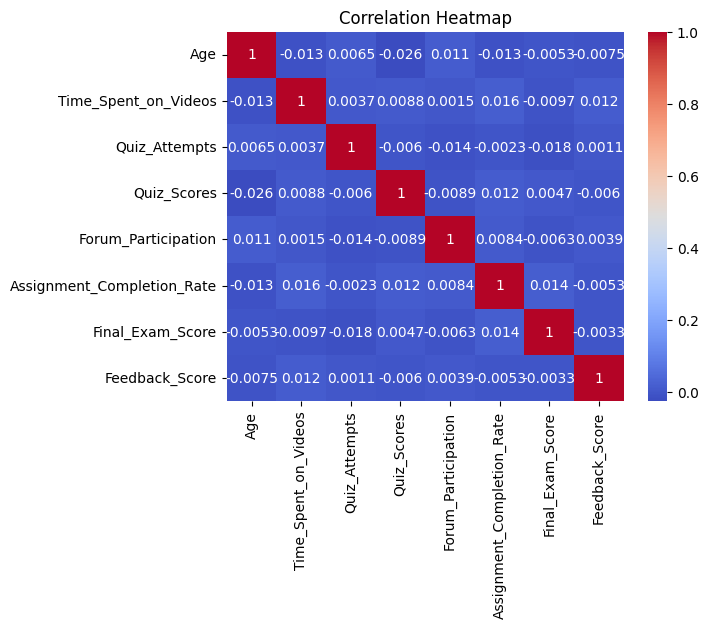

In [19]:
#heatmap
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

**1) Weak or No Strong Correlations**

* Most of the correlations are very close to 0, indicating no strong linear relationship between the numerical variables.
   

**2) Independence of Features**


*   Since no pair of variables has a high correlation (above 0.5 or below -0.5), most features are likely independent of each other.

This suggests that student behaviors (e.g., assignment completion, quiz attempts) don’t strongly affect their final exam score.








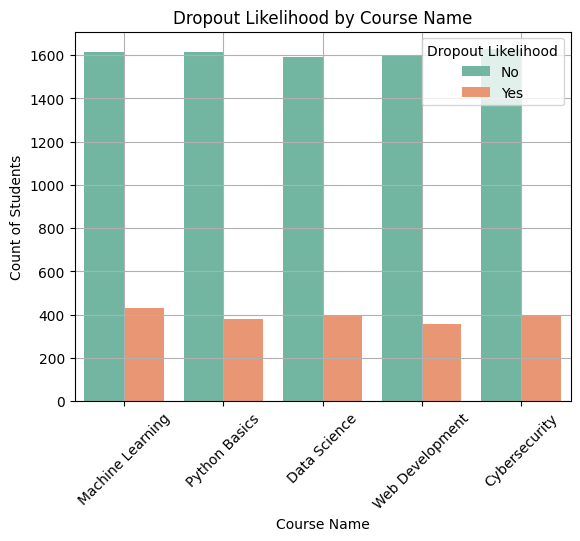

In [20]:
#stacked bar chart to visualize dropout likelihood with course
sns.countplot(data=df, x="Course_Name", hue="Dropout_Likelihood", palette="Set2")
plt.xlabel("Course Name")
plt.ylabel("Count of Students")
plt.title("Dropout Likelihood by Course Name")
plt.legend(title="Dropout Likelihood")
plt.xticks(rotation=45)
plt.grid()
# Show the plot
plt.show()

**1) Overall Dropout Rate:**

In all courses, the number of students who did not drop out  is significantly higher than those who did.

This suggests that most students tend to complete their courses.

**2) Course-Specific Dropout Trends:**

The dropout rate appears to be relatively consistent across different courses.

However, Machine Learning,Cybersecurity and Data Science seem to have slightly higher dropout counts compared to other courses.

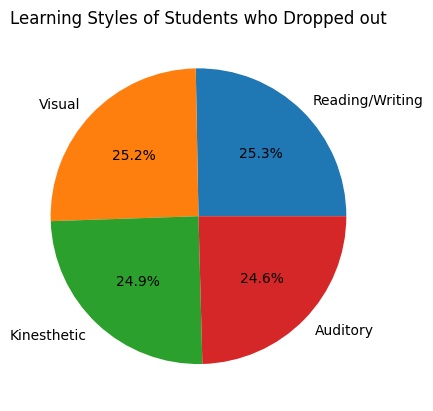

In [21]:
#piechart showing learning style of drop out students
#Filter data for students who dropped out
dropouts=df[df['Dropout_Likelihood']=='Yes']
#Count occurences of each learning style among dropouts
learning_style_counts=dropouts['Learning_Style'].value_counts()
#Creating a pie chart
plt.pie(learning_style_counts,labels=learning_style_counts.index,
        autopct='%1.1f%%')
plt.title('Learning Styles of Students who Dropped out')
plt.show()

**1) Even Distribution of Dropout Rates**


The dropout rates for different learning styles (Visual, Auditory, Kinesthetic, and Reading/Writing) are almost evenly distributed, with each category making up around 25% of the total dropouts.

This suggests that learning style alone may not be a strong predictor of dropout likelihood.

**2) Reading/Writing Learners Have a Slightly Higher Dropout Rate**

25.3% of the dropouts belong to the Reading/Writing category, which is the highest among the four styles.

This could indicate that students who prefer text-based learning may struggle in courses that rely more on videos, discussions, or hands-on activities.

**3) Kinesthetic Learners Have the Lowest Dropout Rate**

The Kinesthetic group (24.9%) has the lowest dropout percentage, though the difference is minimal.

This might suggest that courses with interactive, hands-on components help reduce dropout rates.

<ipython-input-22-c45f1ceb8fae>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Dropout_Likelihood", y="Final_Exam_Score", data=df, palette="Set2")


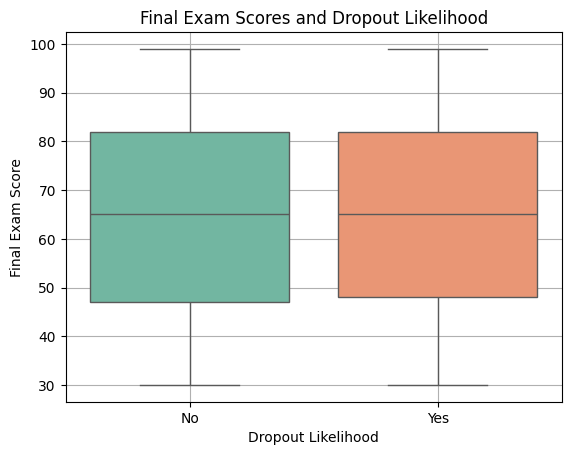

In [22]:
#create a boxplot to show the distribution of final exam for each dropout likelihood category
sns.boxplot(x="Dropout_Likelihood", y="Final_Exam_Score", data=df, palette="Set2")
plt.xlabel("Dropout Likelihood")
plt.ylabel("Final Exam Score")
plt.title("Final Exam Scores and Dropout Likelihood")
plt.grid(True)
plt.show()

**1) Similar Score Distributions for Both Groups**



*  The median final exam score for both  students who dropped out and those who did not drop out is almost the same

*   The interquartile range (IQR) (middle 50% of scores) is also quite similar, meaning dropout status does not seem to significantly impact final exam performance.




**2) Wide Score Range for Both Groups**

Both groups have students with scores ranging from 30 to 100.

This suggests that students with both low and high performance can drop out, meaning final exam scores alone are not a strong predictor of dropout likelihood.



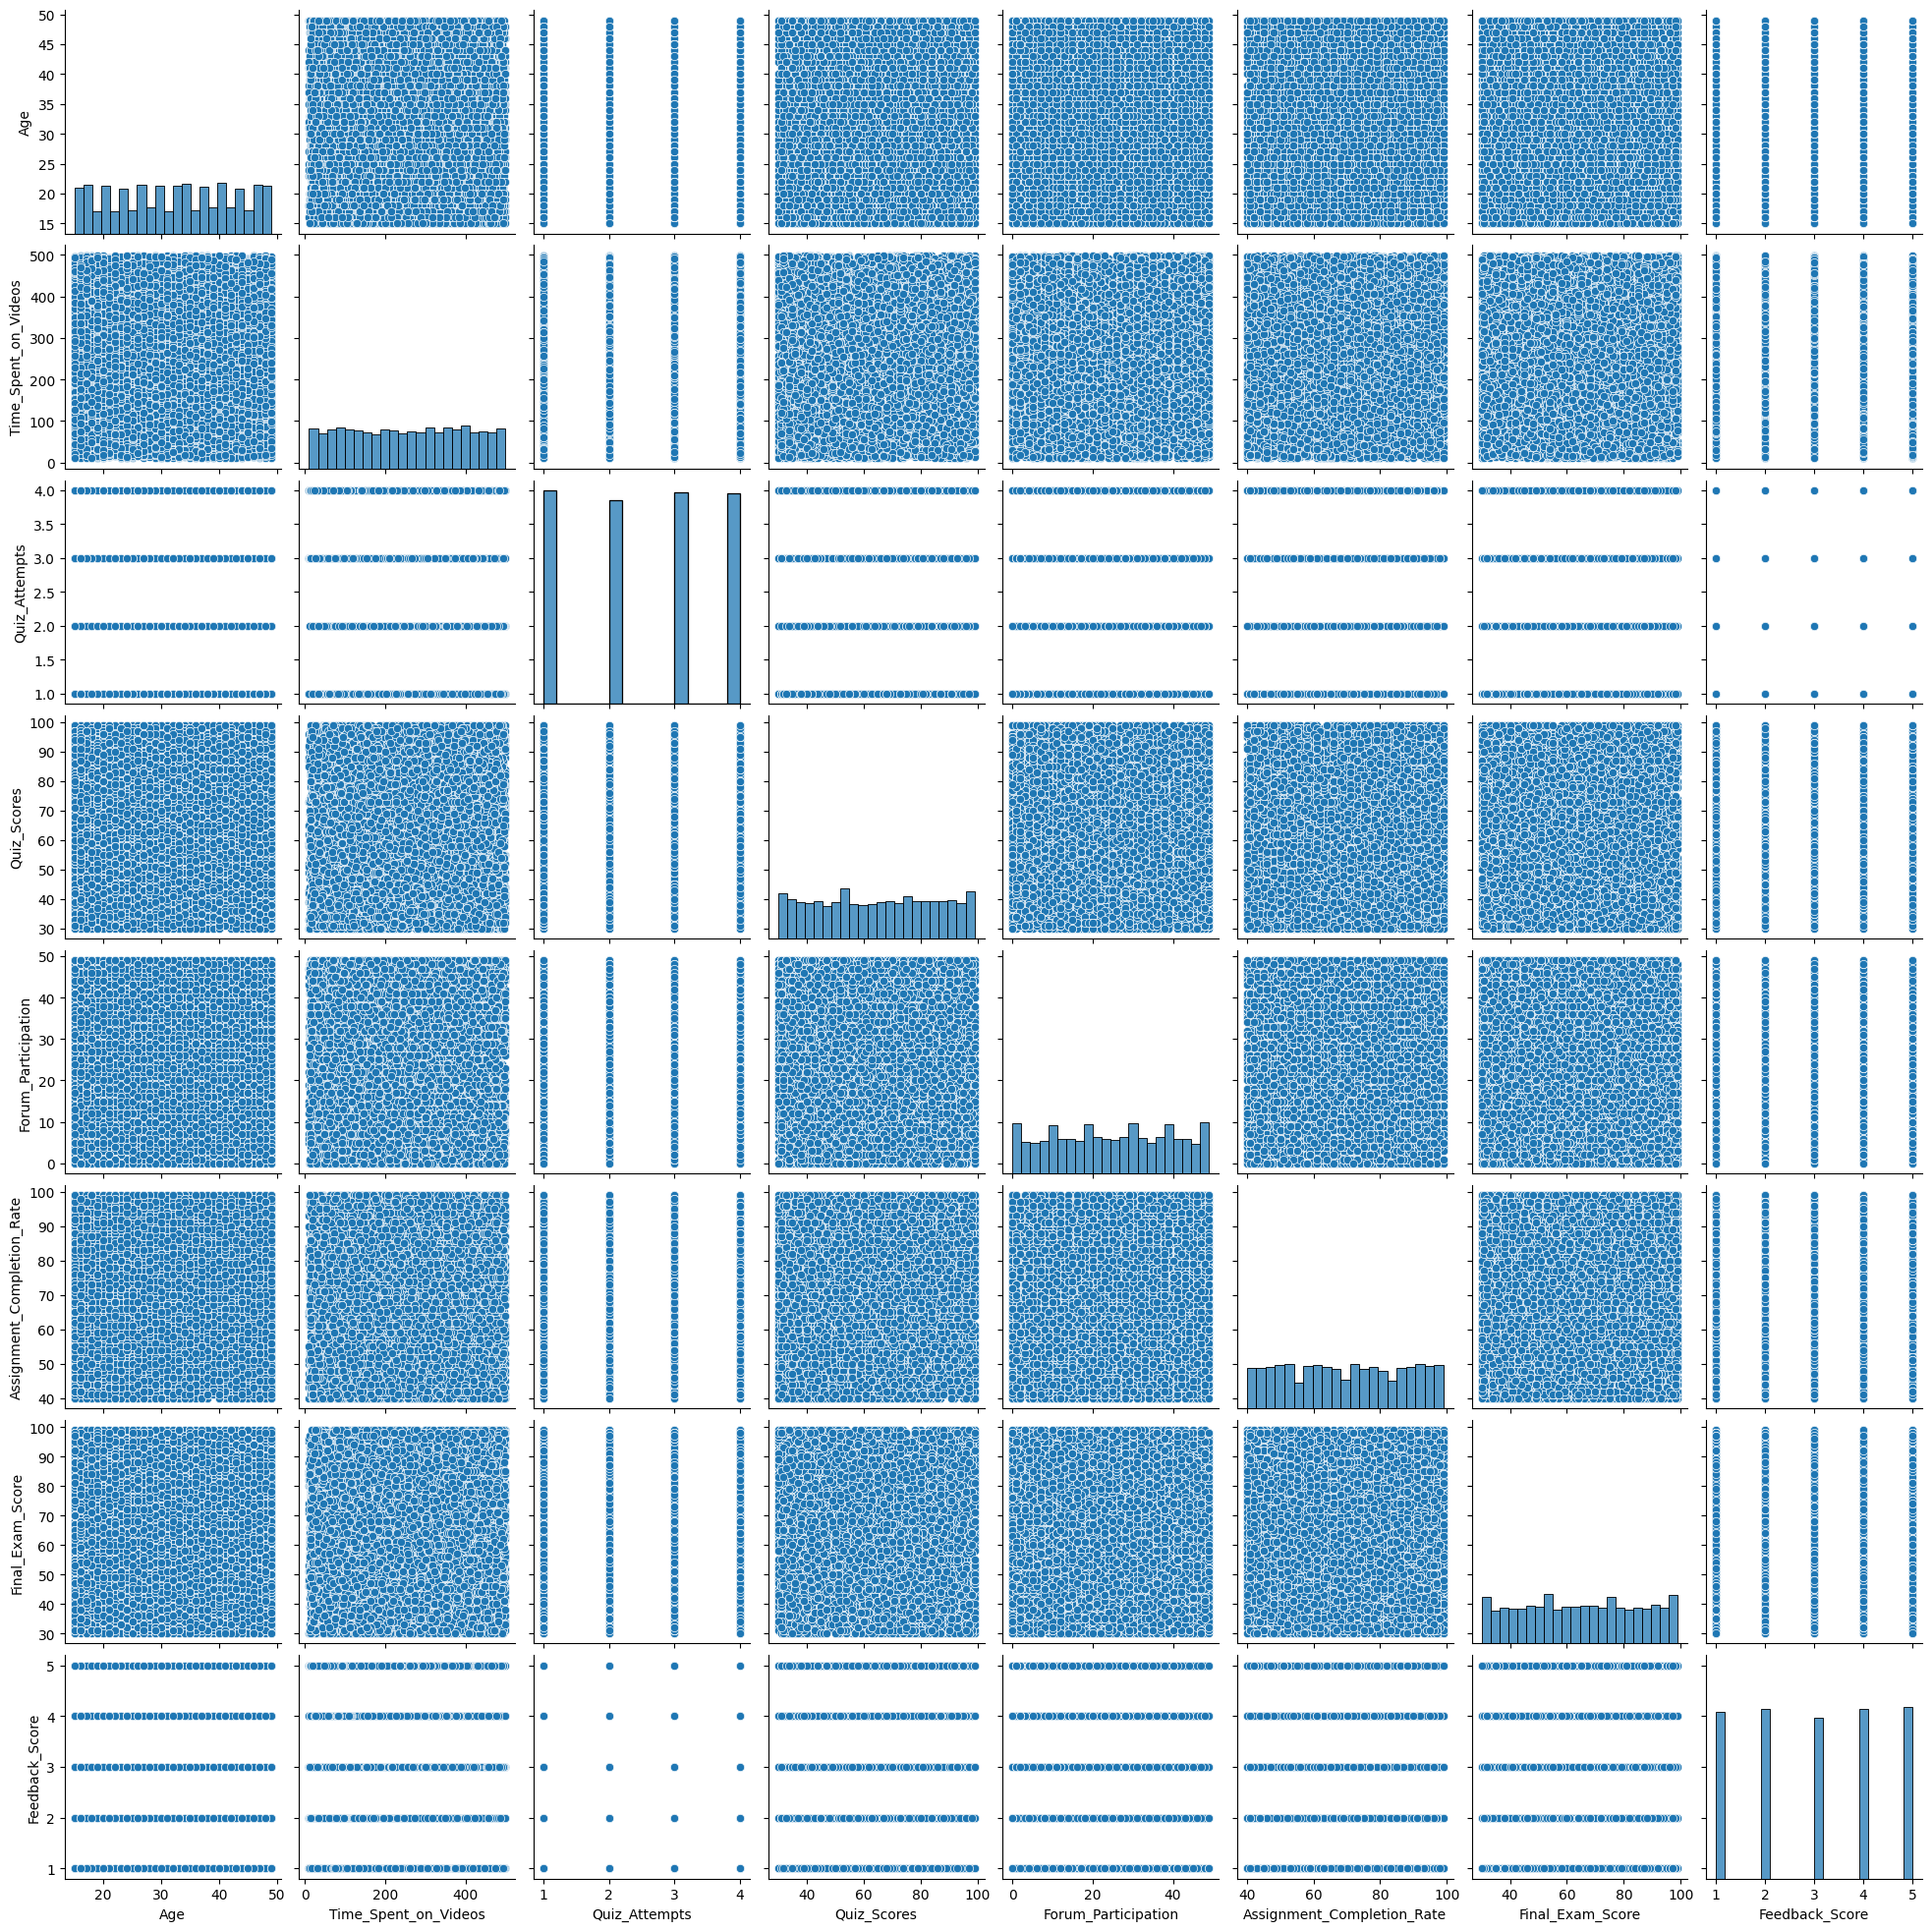

In [23]:
#pairplot to visualize feature relationship
sns.pairplot(df.select_dtypes("number"))
plt.show()

**1) No Strong Linear Relationships Between Features:**

*   The pairplot shows that most variables do not exhibit strong linear correlations with each other.

*   This suggests that predicting dropout likelihood may require non-linear models, such as decision trees, random forests, or neural networks.

**2) Feature Independence and Spread:**



*   Many variables (such as Quiz Scores, Time Spent on Videos, and Forum Participation) appear to be widely spread without clear clustering patterns.
*   This indicates that students' learning behaviors vary significantly and that no single factor alone strongly determines dropout likelihood.










# **FEATURE ENGINEERING**


**1) Feature Encoding**

 Convert categorical data into numerical (One-Hot, Label, Target Encoding).


In [24]:
#One hot encoding Gender column
df=pd.get_dummies(df,columns=['Gender'],dtype= int,drop_first=True)
df.head(5)

,Age,Education_Level,Course_Name,Time_Spent_on_Videos,Quiz_Attempts,Quiz_Scores,Forum_Participation,Assignment_Completion_Rate,Engagement_Level,Final_Exam_Score,Learning_Style,Feedback_Score,Dropout_Likelihood,Gender_Male,Gender_Other
0,15,High School,Machine Learning,171,4,67,2,89,Medium,51,Visual,1,No,0,0
1,49,Undergraduate,Python Basics,156,4,64,0,94,Medium,92,Reading/Writing,5,No,1,0
2,20,Undergraduate,Python Basics,217,2,55,2,67,Medium,45,Reading/Writing,1,No,0,0
3,37,Undergraduate,Data Science,489,1,65,43,60,High,59,Visual,4,No,0,0
4,34,Postgraduate,Python Basics,496,3,59,34,88,Medium,93,Visual,3,No,0,0


In [25]:
#Ordinal Encoding Educational column

#Define Custom order
Custom_order=[['High School','Undergraduate','Postgraduate']]
#Apply Ordinal encoder
encoder=OrdinalEncoder(categories=Custom_order)
df['Education_Level']=encoder.fit_transform(df[['Education_Level']])
df['Education_Level'] = df['Education_Level'].astype(int) #Cast to integers
df.head(5)

,Age,Education_Level,Course_Name,Time_Spent_on_Videos,Quiz_Attempts,Quiz_Scores,Forum_Participation,Assignment_Completion_Rate,Engagement_Level,Final_Exam_Score,Learning_Style,Feedback_Score,Dropout_Likelihood,Gender_Male,Gender_Other
0,15,0,Machine Learning,171,4,67,2,89,Medium,51,Visual,1,No,0,0
1,49,1,Python Basics,156,4,64,0,94,Medium,92,Reading/Writing,5,No,1,0
2,20,1,Python Basics,217,2,55,2,67,Medium,45,Reading/Writing,1,No,0,0
3,37,1,Data Science,489,1,65,43,60,High,59,Visual,4,No,0,0
4,34,2,Python Basics,496,3,59,34,88,Medium,93,Visual,3,No,0,0


In [26]:
#Onehot Encoding Course_Name column
df=pd.get_dummies(df,columns=['Course_Name'],dtype=int,drop_first=True)
df.head(5)

,Age,Education_Level,Time_Spent_on_Videos,Quiz_Attempts,Quiz_Scores,Forum_Participation,Assignment_Completion_Rate,Engagement_Level,Final_Exam_Score,Learning_Style,Feedback_Score,Dropout_Likelihood,Gender_Male,Gender_Other,Course_Name_Data Science,Course_Name_Machine Learning,Course_Name_Python Basics,Course_Name_Web Development
0,15,0,171,4,67,2,89,Medium,51,Visual,1,No,0,0,0,1,0,0
1,49,1,156,4,64,0,94,Medium,92,Reading/Writing,5,No,1,0,0,0,1,0
2,20,1,217,2,55,2,67,Medium,45,Reading/Writing,1,No,0,0,0,0,1,0
3,37,1,489,1,65,43,60,High,59,Visual,4,No,0,0,1,0,0,0
4,34,2,496,3,59,34,88,Medium,93,Visual,3,No,0,0,0,0,1,0


In [27]:
#Ordinal Encoding Engagement_Level column
#Define Custom Order
Custom_order=[['Low','Medium','High']]
encoder=OrdinalEncoder(categories=Custom_order)
df['Engagement_Level']=encoder.fit_transform(df[['Engagement_Level']])
df['Engagement_Level'] = df['Engagement_Level'].astype(int) #Cast to integers
df.head(5)




,Age,Education_Level,Time_Spent_on_Videos,Quiz_Attempts,Quiz_Scores,Forum_Participation,Assignment_Completion_Rate,Engagement_Level,Final_Exam_Score,Learning_Style,Feedback_Score,Dropout_Likelihood,Gender_Male,Gender_Other,Course_Name_Data Science,Course_Name_Machine Learning,Course_Name_Python Basics,Course_Name_Web Development
0,15,0,171,4,67,2,89,1,51,Visual,1,No,0,0,0,1,0,0
1,49,1,156,4,64,0,94,1,92,Reading/Writing,5,No,1,0,0,0,1,0
2,20,1,217,2,55,2,67,1,45,Reading/Writing,1,No,0,0,0,0,1,0
3,37,1,489,1,65,43,60,2,59,Visual,4,No,0,0,1,0,0,0
4,34,2,496,3,59,34,88,1,93,Visual,3,No,0,0,0,0,1,0


In [28]:
#One-hot encoding Learning style column
df=pd.get_dummies(df,columns=['Learning_Style'],dtype=int,drop_first=True)
df.head(5)

,Age,Education_Level,Time_Spent_on_Videos,Quiz_Attempts,Quiz_Scores,Forum_Participation,Assignment_Completion_Rate,Engagement_Level,Final_Exam_Score,Feedback_Score,Dropout_Likelihood,Gender_Male,Gender_Other,Course_Name_Data Science,Course_Name_Machine Learning,Course_Name_Python Basics,Course_Name_Web Development,Learning_Style_Kinesthetic,Learning_Style_Reading/Writing,Learning_Style_Visual
0,15,0,171,4,67,2,89,1,51,1,No,0,0,0,1,0,0,0,0,1
1,49,1,156,4,64,0,94,1,92,5,No,1,0,0,0,1,0,0,1,0
2,20,1,217,2,55,2,67,1,45,1,No,0,0,0,0,1,0,0,1,0
3,37,1,489,1,65,43,60,2,59,4,No,0,0,1,0,0,0,0,0,1
4,34,2,496,3,59,34,88,1,93,3,No,0,0,0,0,1,0,0,0,1


**2) Feature Selection using Random Forest Classifier**

Random Forest is an ensemble learning method that provides built-in feature importance based on how much a feature contributes to reducing impurity (Gini or MSE).

In [29]:
#split the data

X=df.drop("Dropout_Likelihood",axis=1)
Y=df["Dropout_Likelihood"]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

#Feature selecting using random forest classifier
from sklearn.ensemble import RandomForestClassifier
# Train Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

# Get feature importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns)

# Print sorted feature importance
print("🔹 **Feature Importance (High to Low):**")
print(feature_importance.sort_values(ascending=False))

🔹 **Feature Importance (High to Low):**
Time_Spent_on_Videos              0.136177
Final_Exam_Score                  0.119351
Quiz_Scores                       0.118760
Assignment_Completion_Rate        0.115931
Forum_Participation               0.113642
Age                               0.105126
Feedback_Score                    0.050286
Quiz_Attempts                     0.043507
Education_Level                   0.035787
Engagement_Level                  0.032616
Gender_Male                       0.021544
Learning_Style_Reading/Writing    0.016907
Learning_Style_Kinesthetic        0.016384
Learning_Style_Visual             0.015638
Course_Name_Data Science          0.015337
Course_Name_Python Basics         0.013740
Course_Name_Machine Learning      0.012428
Course_Name_Web Development       0.011219
Gender_Other                      0.005620
dtype: float64


In [30]:
#select features with importance >0.01
selected_features=feature_importance[feature_importance>0.01].index
X_selected=X[selected_features]

#print selected features
print("Selected Features(importance>0.01):")
print(selected_features)


Selected Features(importance>0.01):
Index(['Age', 'Education_Level', 'Time_Spent_on_Videos', 'Quiz_Attempts',
       'Quiz_Scores', 'Forum_Participation', 'Assignment_Completion_Rate',
       'Engagement_Level', 'Final_Exam_Score', 'Feedback_Score', 'Gender_Male',
       'Course_Name_Data Science', 'Course_Name_Machine Learning',
       'Course_Name_Python Basics', 'Course_Name_Web Development',
       'Learning_Style_Kinesthetic', 'Learning_Style_Reading/Writing',
       'Learning_Style_Visual'],
      dtype='object')


In [31]:
len(selected_features)

18

In [32]:
#since Gender_other column having low importance we can drop that column
df=df.drop('Gender_Other',axis=1)
df.head(5)

,Age,Education_Level,Time_Spent_on_Videos,Quiz_Attempts,Quiz_Scores,Forum_Participation,Assignment_Completion_Rate,Engagement_Level,Final_Exam_Score,Feedback_Score,Dropout_Likelihood,Gender_Male,Course_Name_Data Science,Course_Name_Machine Learning,Course_Name_Python Basics,Course_Name_Web Development,Learning_Style_Kinesthetic,Learning_Style_Reading/Writing,Learning_Style_Visual
0,15,0,171,4,67,2,89,1,51,1,No,0,0,1,0,0,0,0,1
1,49,1,156,4,64,0,94,1,92,5,No,1,0,0,1,0,0,1,0
2,20,1,217,2,55,2,67,1,45,1,No,0,0,0,1,0,0,1,0
3,37,1,489,1,65,43,60,2,59,4,No,0,1,0,0,0,0,0,1
4,34,2,496,3,59,34,88,1,93,3,No,0,0,0,1,0,0,0,1


# **Handling Class Imbalance**
Class imbalance occurs when one class has significantly more instances than another. This can negatively impact model performance, leading to biased predictions.

In [33]:
df["Dropout_Likelihood"].value_counts()

,count
Dropout_Likelihood,
No,8043
Yes,1957


In [34]:
#Calculate class imbalancde ratio
maj_class=df["Dropout_Likelihood"].value_counts().max()
min_class=df["Dropout_Likelihood"].value_counts().min()
ratio=maj_class/min_class
print(f"Class Imbalance Ratio: {ratio}")

Class Imbalance Ratio: 4.109862033725089


**The dataset exhibits a class imbalance with a CIR of 4.11. This suggests that the majority class significantly outweighs the minority class. While this is not extreme, imbalance handling techniques such as SMOTE or class-weight adjustments could enhance model fairness and accuracy.**

# **SMOTE to handle imbalanced data**

SMOTE (Synthetic Minority Over-sampling Technique) is a powerful oversampling method used to handle imbalanced datasets in machine learning. Instead of simply duplicating minority class samples, SMOTE generates synthetic samples by interpolating between existing minority class instances.





In [35]:
from imblearn.over_sampling import SMOTE
from collections import Counter
X = df.drop('Dropout_Likelihood', axis=1)
y = df['Dropout_Likelihood']
#Check class distribution Before balancing
print("Before SMOTE:",Counter(y))

#Apply Smote to Balance the training Set
smote=SMOTE(sampling_strategy='auto',random_state=42)
x_resampled,y_resampled=smote.fit_resample(X,y)

#check class distribution after resampling
print('After SMOTE :',Counter(y_resampled))



Before SMOTE: Counter({'No': 8043, 'Yes': 1957})
After SMOTE : Counter({'No': 8043, 'Yes': 8043})


#  **Splitting dataset into train and test sets**

In [36]:

x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,test_size=0.2,random_state=42)


This splits the data into 80% training and 20% testing sets.

In [37]:
#print the shape of training and testing data
print("Training Data shape :")
print("x_train:",x_train.shape)
print("y_train:",y_train.shape)

print("\nTesting Data shape :")
print("x_test:",x_test.shape)
print("y_test:",y_test.shape)

Training Data shape :
x_train: (12868, 18)
y_train: (12868,)

Testing Data shape :
x_test: (3218, 18)
y_test: (3218,)


# **Feature Scaling using Standard Scalar**

StandardScaler centers the data (mean = 0) and scales it to unit variance (std = 1).
Works well when data follows a normal distribution.

In [38]:
#Binary columns should not be scaled
# Identify Binary Columns (Columns with Only 2 Unique Values)
binary_cols = [col for col in df.columns if df[col].nunique() == 2]

# Identify non-binary numeric columns
numeric_cols=df.select_dtypes(include=['number']).columns
non_binary_cols=[col for col in numeric_cols if col not in binary_cols]

#Apply Standard Scalar only to non binary columns
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

# Convert x_train_resampled back to DataFrame
x_train_df = pd.DataFrame(x_train)
x_train_scaled=scaler.fit_transform(x_train[non_binary_cols])
x_test_scaled=scaler.fit_transform(x_test[non_binary_cols])


# **Basic Model Building**

**These are the five models used to train on my dataset.**

1)Decision Trees

2)Random Forest

3)Support Vector Machines (SVM)

4)k-Nearest Neighbors (k-NN)

5) Gradient Boosting

# **1)Decsion Tree**

A Decision Tree is a supervised learning algorithm used for classification and regression tasks.The structure resembles a tree, with nodes representing decisions, branches representing choices, and leaves representing outcomes or predictions.

# **2) Random Forest**

A Random Forest algorithm consists of multiple decision trees and aggregates their predictions. Each tree is built on a random subset of data and features.

Aggregate:
 Take a majority vote across the trees.

# **3) Support Vector Machine**

SVC uses a set of labeled training examples to find a decision boundary that separates the data points into different classes. The decision boundary is represented as a linear function, and the goal is to find the boundary that maximizes the separation between the classes.

# **4) KNN Classifier**

In classification, K-Nearest Neighbors (KNN) assigns a class to a data point based on the most common class among its 'k' nearest neighbors. It classifies by finding the 'k' closest points in the training set and using their labels to determine the class of the new point.

# **5) Gradient Boosting**

Algorithm: Starts with an initial prediction (often the mean of the target variable). Computes residuals (errors) from the actual values. Trains the next weak learner to minimize these residuals. Combines models iteratively, reducing errors step by step.

In [39]:
#importing required libraries for the model implementation
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier



In [40]:
#Defining models to train
models={
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "SVM":SVC(),
    "KNN":KNeighborsClassifier(),
    "Gradient Boosting":GradientBoostingClassifier()
}



In [41]:
#Train and evaluate models
results=[] #store results for each model
for name, model in models.items():  # Iterate through the model dictionary
    # Train the model using appropriate data
    if name in ["SVM", "KNN"]:  # Non-tree-based models
        model.fit(x_train_scaled, y_train)  # Use scaled data
        y_train_pred=model.predict(x_train_scaled)
        y_test_pred = model.predict(x_test_scaled)  # Predict on scaled test data
    else:  # Tree-based models
        model.fit(x_train, y_train)  # Use unscaled data
        y_train_pred=model.predict(x_train)
        y_test_pred = model.predict(x_test)  # Predict on unscaled test data

    train_accuracy=accuracy_score(y_train,y_train_pred)
    test_accuracy=accuracy_score(y_test,y_test_pred)
#Append results to the list
    results.append({
    'Model':name,
    "Train Accuracy":train_accuracy,
    "Test Accuracy":test_accuracy
}
)
 #Convert results to Dataframe
results_data=pd.DataFrame(results)
results_data



,Model,Train Accuracy,Test Accuracy
0,Decision Tree,1.000000,0.724052
1,Random Forest,1.000000,0.826600
2,SVM,0.714252,0.676507
3,KNN,0.814035,0.711622
4,Gradient Boosting,0.788623,0.777191


**INSIGHTS:**

1) **Random Forest Performed the Best**



*   Achieved the highest test accuracy of 82.6%, indicating it generalizes well to unseen data.


*   Despite showing overfitting (train accuracy = 100%), its test performance suggests it's still the most robust among the models evaluated.


---


2)  **Decision Tree is Highly Overfitted**



*   Achieved perfect accuracy (100%) on training data but dropped significantly to 72.5% on test data.


*   This suggests it memorized the training data rather than learning general patterns.




---
3) **Gradient Boosting Strikes a Balance**



*   Has a good balance between train (78.9%) and test (77.7%) accuracies.


*   Indicates it learned generalizable patterns without significant overfitting.



---

4)  **SVM Likely Underfitted the Data**



*   Shows relatively low train accuracy (71.4%) and even lower test accuracy (67.6%).




*   This suggests the model may not be complex enough or the data may not be well-suited for a linear SVM kernel.
---
5) **KNN Shows Moderate Performance**


*   Train accuracy: 81.4%, test accuracy: 71.2%.



*   Some overfitting is present, but it’s not extreme. It performs reasonably well but not the best.





**Overall Recommendation**

Random Forest is the most suitable model for this dataset in terms of accuracy.

Gradient Boosting offers a good trade-off between performance and generalization.

Further tuning (e.g., hyperparameter optimization, feature selection, or cross-validation) could improve performance and reduce overfitting.



.


























# **Model Evaluation :**

**Classification Matrics**





In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = []

for name, model in models.items():
    if name in ["SVM", "KNN"]:
        model.fit(x_train_scaled, y_train)
        y_train_pred = model.predict(x_train_scaled)
        y_test_pred = model.predict(x_test_scaled)
    else:
        model.fit(x_train, y_train)
        y_train_pred = model.predict(x_train)
        y_test_pred = model.predict(x_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# Convert to DataFrame
results_data = pd.DataFrame(results)
results_data = results_data.sort_values(by='F1 Score', ascending=False)
results_data.reset_index(drop=True, inplace=True)
results_data

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.823493,0.833648,0.823493,0.822176
1,Gradient Boosting,0.777191,0.777506,0.777191,0.777137
2,Decision Tree,0.717837,0.718649,0.717837,0.717548
3,KNN,0.711622,0.726186,0.711622,0.706792
4,SVM,0.676507,0.677141,0.676507,0.676182


# **Insights  Model Evaluation**

1) **Random Forest again outperforms all other models**



*   Highest recall (83.2%) and accuracy (82.1%), showing its strong ability to correctly identify true positives.
*   Balanced precision and F1-score, making it a reliable and consistent model.

---

2) **Gradient Boosting performs consistently**



*All metrics are around 77.7%, indicating stable and balanced performance without overfitting.




* This model would be a good alternative when interpretability and generalization are important.

---

3) **Decision Tree remains weaker**



*   Accuracy and F1-score are around 72.3%, reflecting earlier observations about overfitting and less generalization power.
---

4)**KNN performs moderately**



*   Slightly better recall (72.6%) than its precision (71.1%), meaning it's identifying more true positives but with more false positives too.
*  Lower accuracy compared to ensemble models.

5) **SVM has the lowest scores**



*  All metrics are around 67.6%, indicating it struggles with both precision and recall.
*  This might be due to model simplicity, wrong kernel, or lack of preprocessing like scaling.





**Final Model Recommendation (for Unseen Data)**

Based on both accuracy and balanced performance metrics, Random Forest is the best model for your classification task.






























# **Hyperparameter Tuning**

Hyperparameter tuning is the process of selecting the best set of hyperparameters to optimise the a machine learning model's performance.Unlike model parameters (learned from data),hyperparametrs are set manually before training.



*   Improves Accuracy-Finds the best settings for better predictions

*  Prevents Overfitting/Underfitting-Balances model complexity.


*   Enhances Generalization-Ensures the model works well on unseen data.
*   GridSearchCV,RandomisedSearchCV and Bayesian Optimization are some methods for hyperparameter tuning.


*   Since,hyperparameter is time consuming,its better to focus on models that show promising performance.Here,we only perform hyperparameter tuning on Random Classifier








In [43]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

param_dist = {
    'n_estimators': [100, 200, 300, 400],        # Number of trees
    'max_depth': [5, 10, 15, None],             # Depth of each tree
    'min_samples_split': [2, 5, 10],             # Minimum samples to split a node
    'min_samples_leaf': [3, 5, 10],               # Minimum samples at a leaf node
    'max_features': ['sqrt'],           # Features to consider at each split
    'bootstrap': [True, False]                   # Use bootstrap samples or not
}

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,              # Try 20 random combinations
    cv=5,                   # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1               # Use all CPU cores
)

random_search.fit(x_train, y_train)

print("Best Hyperparameters:", random_search.best_params_)









Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 15, 'bootstrap': False}


In [44]:
#Train Random forest classifier model
model = RandomForestClassifier(n_estimators=100,min_samples_split=2,min_samples_leaf=3,max_features= 'sqrt',max_depth=15,bootstrap=False)
model.fit(x_train, y_train)

# Compute accuracy
train_accuracy = accuracy_score(y_train, model.predict(x_train))
test_accuracy = accuracy_score(y_test, model.predict(x_test))

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")


Training Accuracy: 0.9720
Testing Accuracy: 0.8163


# **Saving the Model**

**joblib** : joblib is a python library used for efficiently saving and loading machine learning models,especially large models with complex structures

In [45]:
 #importing library
import joblib
# Saveing the trained model
joblib.dump(model, "random_forest_model.pkl")
print("Model saved successfully!")

Model saved successfully!


# **Pipeline for ML model**
A **Machine learning pipeline** was implemented to automate data preprocessing,feature selection and model training ensuring efficiency and reproducibility.



*  Data Preprocessing and scaling : They were applied for consistency.

*  Feature Selection: **Random Forest Classifier** was used to select the most relevant features.

*   Handling Imbalanced Data: SMOTE was applied to balance class distribution.
*   Model Training : Random Forest was chosen as the Final model and applied hyperparameter tuning.






In [46]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.feature_selection import SelectFromModel
#Define the pipeline
pipeline = ImbPipeline([
    ('imputer',SimpleImputer(strategy='mean')),
    ('Encoder',OrdinalEncoder()),
    ('Feature_Selection',SelectFromModel(RandomForestClassifier(n_estimators=100))), # This step is problematic and needs to be defined
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])





# Train the pipeline
pipeline.fit(x_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('Encoder', OrdinalEncoder()),
                ('Feature_Selection',
                 SelectFromModel(estimator=RandomForestClassifier())),
                ('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier(random_state=42))])

In [47]:
# Saving the Pipeline
joblib.dump(pipeline, 'pipeline.joblib')
print("Pipeline saved successfully!")

Pipeline saved successfully!


In [48]:
import joblib

# Save the trained pipeline to a file
joblib.dump(pipeline, 'random_forest_pipeline.pkl')
print("Pipeline saved successfully!")

Pipeline saved successfully!


**Test with Unseen Data**

In [49]:
#prepare unseen data
import pandas as pd
unseen_data=pd.DataFrame({
    'Age': [25, 32, 28, 35],
    'Education_Level': [1, 2, 0, 1],
    'Time_Spent_on_Videos': [200, 280, 240, 300],
    'Quiz_Attempts': [3, 2, 1, 3],
    'Quiz_Scores': [75, 80, 65, 85],
    'Forum_Participation': [15, 30, 20, 25],
    'Assignment_Completion_Rate': [80, 95, 70, 90],
    'Engagement_Level': [2, 1, 1, 2],
    'Final_Exam_Score': [78, 85, 72, 88],
    'Feedback_Score': [4, 3, 3, 4],
    'Gender_Male': [0, 1, 1, 0],
    'Course_Name_Data Science': [1, 0, 1, 0],
    'Course_Name_Machine Learning': [0, 1, 0, 1],
    'Course_Name_Python Basics': [0, 0, 0, 0],
    'Course_Name_Web Development': [0, 0, 0, 0],
    'Learning_Style_Kinesthetic': [1, 0, 1, 0],
    'Learning_Style_Reading/Writing': [0, 1, 0, 1],
    'Learning_Style_Visual': [0, 0, 0, 0]
})

# Make predictions on the unseen data
unseen_predictions = pipeline.predict(unseen_data)

# Display predictions for the unseen data
print(unseen_predictions)














['No' 'Yes' 'No' 'Yes']


**INSIGHTS**

Model predicts a mix of 'No' (no dropout) and 'Yes' (dropout) for the four students in the unseen data. This indicates more diversity in the student profiles and suggests that the model is identifying some students as being at higher risk of dropping out.



# **CONCLUSION**

This project successfully developed a predictive model for student dropout likelihood in personalized learning. The Random Forest Classifier achieved the highest accuracy (82.6%), outperforming other models. Key factors influencing dropout were identified, including time spent on videos, quiz scores, and final exam scores.

## **Key Findings**

*   Random Forest proved to be the most accurate model.
*   Important features driving dropout prediction were identified.


*   SMOTE effectively handled class imbalance, improving prediction for at-risk students.
*   An automated pipeline was built for efficient and reproducible analysis.



*   Course-specific dropout trends were observed.


## **Recommendations:**



*   Utilize the model and identified risk factors for early intervention.

* Offer personalized support based onstudent needs and learning styles.
*   Address course-specific challenges to improve retention.

*   Continuously monitor and update the model for optimal performance.



## **Future Directions:**



*   Explore more advanced feature engineering techniques.
*   Investigate social and emotional factors impacting dropout.


*  Develop a user interface for educators to access model predictions.
*   Validate the model on a larger and more diverse dataset.

This project provides a valuable tool for predicting student dropout and offers actionable recommendations for improving retention and student success in personalized learning environments. By implementing these strategies, institutions can foster more engaging learning experiences and enhance student outcomes.









